# Sistema de Orientação Vocacional

#### Importação das bibliotecas

In [1]:
%run ../services/imports.py
%run ../services/visualization.py
%run ../services/metrics_clf.py
import services.lista_estados_regioes as lesr


%run ../services/function.py
%run ../services/classifier_evaluation.py

importing Jupyter notebook from /home/jean/project/project_dataScience_POSCOMP/notebooks/../services/especialidades.ipynb
importing Jupyter notebook from /home/jean/project/project_dataScience_POSCOMP/notebooks/../services/lista_estados_regioes.ipynb


In [2]:
# Criar instância da classe
visualizacao = Visualizacao()

## Aplicação dos algoritmos de aprendizado de máquina

0 - Computação
1 - Informação

Computação
0 - Inteligência Artificial
1 - Sistemas de Computação

Informação
0 - Engenharia de Software
1 - Redes de Computadores

# Código organizado

In [3]:
# Carregar base de dados
dataset_poscomp = pd.read_csv("../dados/df_poscomp.csv")
dataset_poscomp = dataset_poscomp.query('linhas_pesquisas != "Outros"')
dataset_poscomp.columns = dataset_poscomp.columns.str.lower()

In [4]:
dataset_poscomp.head()

,sexo,estado,especialidade,matemática discreta,cálculo diferencial e integral,álgebra linear,geometria analítica,análise combinatória,probabilidade e estatística,lógica matemática,...,processamento de imagens,banco de dados,idade,matematica,fund_computacao,tec_computacao,total,linhas_pesquisas,area_concentration,regiao
0,M,RS,metodologias e técnicas de computação,3,2,3,2,2,2,2,...,2,1,21,16,22,12,50,engenharia de software,informatica,sul
1,M,SP,engenharia de software,0,1,1,1,0,0,1,...,2,1,25,4,16,8,28,engenharia de software,informatica,sudeste
2,M,PA,sistemas de informação,1,0,1,1,0,0,1,...,1,0,30,4,13,7,24,sistemas de computação,computacao,norte
4,M,MS,sistemas de computação,1,2,3,1,1,2,2,...,1,0,21,12,20,11,43,sistemas de computação,computacao,centro_oeste
5,M,PB,metodologias e técnicas de computação,1,1,1,1,1,2,2,...,1,1,25,9,17,11,37,engenharia de software,informatica,nordeste


In [5]:
# Codificar variáveis categóricas
def encode_categorical_columns(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

categorical_columns = ["sexo", "regiao", "estado"]
dataset_poscomp = encode_categorical_columns(dataset_poscomp, categorical_columns)

In [6]:
dataset_poscomp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8613 entries, 0 to 9892
Data columns (total 36 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   sexo                                             8613 non-null   int64 
 1   estado                                           8613 non-null   int64 
 2   especialidade                                    8613 non-null   object
 3   matemática discreta                              8613 non-null   int64 
 4   cálculo diferencial e integral                   8613 non-null   int64 
 5   álgebra linear                                   8613 non-null   int64 
 6   geometria analítica                              8613 non-null   int64 
 7   análise combinatória                             8613 non-null   int64 
 8   probabilidade e estatística                      8613 non-null   int64 
 9   lógica matemática                             

In [7]:
# Filtrar colunas relevantes
df_poscomp = dataset_poscomp[['idade','sexo','regiao','estado', 'matematica', 'fund_computacao', 'tec_computacao', 'total']]

In [8]:
# Carregar classificadores
random_forest_model1 = pickle.load(open('../dados/classificadores/randomForest_finalizado_model1.sav',"rb"))
random_forest_model2 = pickle.load(open('../dados/classificadores/randomForest_finalizado_model2.sav',"rb"))
random_forest_model3 = pickle.load(open('../dados/classificadores/randomForest_finalizado_model3.sav',"rb"))

In [9]:
# Prever área com modelo 1
df_poscomp['area_prevista'] = random_forest_model1.predict(df_poscomp.values)
df_poscomp['area_prevista'] = df_poscomp['area_prevista'].map({0: 'computacao', 1: 'informatica'})


In [10]:
df_poscomp['area_prevista'].value_counts()

area_prevista
computacao     6530
informatica    2083
Name: count, dtype: int64

In [11]:
# Dividir dados para modelos 2 e 3
model2_poscomp = df_poscomp[df_poscomp['area_prevista'] == 'computacao']
model3_poscomp = df_poscomp[df_poscomp['area_prevista'] == 'informatica']

In [12]:
# Prever subáreas com modelos 2 e 3
model2_poscomp['model_prevista'] = random_forest_model2.predict(model2_poscomp.drop(['area_prevista'], axis=1).values)
model2_poscomp['model_prevista'] = model2_poscomp['model_prevista'].map({0: 'inteligência artificial', 1: 'sistemas de computação'})

In [13]:
model3_poscomp['model_prevista'] = random_forest_model3.predict(model3_poscomp.drop(['area_prevista'], axis=1).values)
model3_poscomp['model_prevista'] = model3_poscomp['model_prevista'].map({0: 'engenharia de software', 1: 'redes de computadores'})

#### Junta as bases

In [14]:
df = pd.concat([model2_poscomp, model3_poscomp])

In [15]:
df = df.sort_index()

In [16]:
df

,idade,sexo,regiao,estado,matematica,fund_computacao,tec_computacao,total,area_prevista,model_prevista
0,21,1,4,22,16,22,12,50,computacao,inteligência artificial
1,25,1,3,25,4,16,8,28,informatica,engenharia de software
2,30,1,2,13,4,13,7,24,computacao,inteligência artificial
4,21,1,0,11,12,20,11,43,computacao,inteligência artificial
5,25,1,1,14,9,17,11,37,informatica,engenharia de software
...,...,...,...,...,...,...,...,...,...,...
9888,22,0,3,10,14,16,8,38,computacao,inteligência artificial
9889,48,1,1,14,10,16,9,35,informatica,engenharia de software
9890,24,1,3,25,9,18,8,35,computacao,inteligência artificial
9891,25,1,3,7,10,16,6,32,computacao,inteligência artificial


In [17]:
df['linhas_pesquisas'] = dataset_poscomp['linhas_pesquisas']
df['area_concentration'] = dataset_poscomp['area_concentration']

In [18]:
df_test_comp = df[df['area_concentration']=='computacao']
df_test_inf = df[df['area_concentration']=='informatica']

In [19]:
df['comparacao_linhas'] = df.apply(lambda x: x['model_prevista'] == x['linhas_pesquisas'], axis=1)

In [20]:
df['comparacao_linhas'].value_counts()

comparacao_linhas
True     4530
False    4083
Name: count, dtype: int64

In [21]:
(4530 / df.shape[0]) * 100

52.594914663880175

In [22]:
df[['model_prevista','linhas_pesquisas']]

,model_prevista,linhas_pesquisas
0,inteligência artificial,engenharia de software
1,engenharia de software,engenharia de software
2,inteligência artificial,sistemas de computação
4,inteligência artificial,sistemas de computação
5,engenharia de software,engenharia de software
...,...,...
9888,inteligência artificial,inteligência artificial
9889,engenharia de software,redes de computadores
9890,inteligência artificial,engenharia de software
9891,inteligência artificial,inteligência artificial


In [23]:
qtd_linhas = dataset_poscomp.groupby('linhas_pesquisas').size().reset_index(name="counts")
qtd_linhas.sort_values(by='counts', ascending=False, inplace=True)

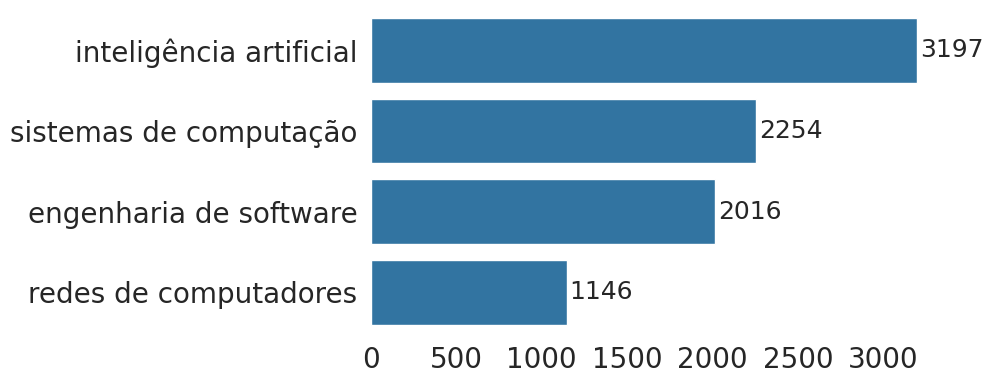

In [46]:
visualizacao.barplot_view(dataframe=qtd_linhas, y='linhas_pesquisas', x='counts', show_legend=False, fontsize=20,
                         figsize=(10,4), dodge=True, save_path='../imagens/classes.pdf')

In [25]:
espec = ['inteligência artificial',
                     'sistemas de computação',
                     'redes de computadores',
                     'engenharia de software',
                     ]
espec.sort()


In [26]:
lista_val = [0,1,2,3]
dicionario = dict(zip(lista_val, espec))

In [27]:
dicionario

{0: 'engenharia de software',
 1: 'inteligência artificial',
 2: 'redes de computadores',
 3: 'sistemas de computação'}

In [32]:
testando = np.zeros((4, 4))
testando

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [33]:
for i, row in df.iterrows():
    pred = row['model_prevista']
    true = row['linhas_pesquisas']
    i_pred = espec.index(pred)
    i_true = espec.index(true)
    testando[i_true, i_pred] += 1

In [34]:
cm = pd.DataFrame(testando)
cm

,0,1,2,3
0,839.0,910.0,84.0,183.0
1,200.0,2617.0,116.0,264.0
2,349.0,520.0,217.0,60.0
3,258.0,1119.0,20.0,857.0


In [36]:
# Calcular os valores de TP, FP e FN
tp = np.diag(testando)[2]
fp = np.sum(testando[:, 2]) - tp
fn = np.sum(testando[2, :]) - tp

# Calcular os verdadeiros negativos (TN)
total = np.sum(testando)
tn = total - (tp + fp + fn)

print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Negatives (TN):", tn)

True Positives (TP): 217.0
False Positives (FP): 220.0
False Negatives (FN): 929.0
True Negatives (TN): 7247.0


In [37]:
np.sum(testando)

8613.0

In [38]:
(tp + tn) / (tp + fp + fn + tn)

0.866597004528039

In [39]:
def calcular_matrix(confusion_matrix, class_index):
    # Calcular os valores de TP, FP e FN
    tp = np.diag(confusion_matrix)[class_index]
    fp = np.sum(confusion_matrix[:, class_index]) - tp
    fn = np.sum(confusion_matrix[class_index, :]) - tp
    
    # Calcular os verdadeiros negativos (TN)
    total = np.sum(confusion_matrix)
    tn = total - (tp + fp + fn)
    
    return tp, fp, fn, tn

In [41]:
def calcular_acuracia(tp, fp, fn, tn):
    # Calcular a acurácia
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    return accuracy

def calcular_precisao(tp, fp):
    # Calcular a precisão
    precision = tp / (tp + fp)
    return precision

def calcular_recall(tp, fn):
    # Calcular a sensibilidade (recall)
    recall = tp / (tp + fn)
    return recall

def calcular_especificidade(fp, tn):
    # Calcular a especificidade
    specificity = tn / (fp + tn)
    return specificity

def calcular_f1_score(precision, recall):
    # Calcular o F1-score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [43]:
metrics_calculator = MetricasClassificacao()
result_df = metrics_calculator.calcular_metricas(cm)
print(result_df)

   Accuracy  Precision    Recall  Specificity  F1 Score
0  0.769651   0.416171  0.509721     0.831061  0.458220
1  0.636712   0.818580  0.506581     0.831738  0.625852
2  0.866597   0.189354  0.496568     0.886375  0.274163
3  0.778939   0.380213  0.628299     0.807284  0.473742


In [44]:
result_df.applymap(lambda x: '{:.2f}%'.format(x * 100))

,Accuracy,Precision,Recall,Specificity,F1 Score
0,76.97%,41.62%,50.97%,83.11%,45.82%
1,63.67%,81.86%,50.66%,83.17%,62.59%
2,86.66%,18.94%,49.66%,88.64%,27.42%
3,77.89%,38.02%,62.83%,80.73%,47.37%


#### Sistema Pronto

In [ ]:
def classificar_area_nova_dado(novo_dado):
    # Carregar classificador do modelo 1
    random_forest_model1 = pickle.load(open('../dados/classificadores/randomForest_finalizado2.sav',"rb"))
    
    # Prever área com modelo 1
    area_prevista = random_forest_model1.predict(novo_dado)
    
    if area_prevista == 0:
        # Carregar classificador do modelo 2
        random_forest_model2 = pickle.load(open('../dados/classificadores/randomForest_finalizado_model2.sav',"rb"))
        
        # Prever subárea com modelo 2
        subarea_prevista = random_forest_model2.predict(novo_dado)
        subarea_prevista = 'Inteligência Artificial' if subarea_prevista == 0 else 'Sistemas de Computação'
        
        return f"A área é Computação e a subárea prevista é {subarea_prevista}."
    
    elif area_prevista == 1:
        # Carregar classificador do modelo 3
        random_forest_model3 = pickle.load(open('../dados/classificadores/randomForest_finalizado_model3.sav',"rb"))
        
        # Prever subárea com modelo 3
        subarea_prevista = random_forest_model3.predict(novo_dado)
        subarea_prevista = 'Engenharia de Software' if subarea_prevista == 0 else 'Redes de Computadores'
        
        return f"A área é Informática e a subárea prevista é {subarea_prevista}."
    
    else:
        return "Não foi possível determinar a área."


In [ ]:
         "idade",
        "sexo",
        "regiao",
        "estado",
        "matematica",
        "fund_computacao",
        "tec_computacao",
        "total",
        "area_concentration",

In [ ]:
# Exemplo de uso
novo_dado = [[29,0,0,13,8,12,5,25]]  # Exemplo de novo dado
resultado = classificar_area_nova_dado(novo_dado)
print(resultado)